0 243

Parameters and their errors 1 :
A = 4.1716777873901 +/- 0.29798204906535125
mu = 1816.3674675203056 +/- 0.001561168961553978
Sigma = -0.015716908991337937 +/- 0.0015546743764688058 

243 435

Parameters and their errors 2 :
A = 4.739490462641891 +/- 0.3034953191767027
mu = 1816.7235476571118 +/- 0.0009941855393484167
Sigma = 0.013390944968908466 +/- 0.0010078691011553423 

435 677

Parameters and their errors 3 :
A = 4.125801532065076 +/- 0.313320928655132
mu = 1817.0831147889087 +/- 0.001240887513715258
Sigma = 0.014156798505311 +/- 0.0012409002075142535 

677 909

Parameters and their errors 4 :
A = 4.257210186786238 +/- 0.3286077095529222
mu = 1817.4400230323602 +/- 0.0011953119891357298
Sigma = -0.013560709992175027 +/- 0.0011622079298406055 

909 1153

Parameters and their errors 5 :
A = 4.307388863713535 +/- 0.28337443036495485
mu = 1817.7957560678342 +/- 0.001175239907814187
Sigma = -0.01519194440055514 +/- 0.0011929889285097021 

1153 1408

Parameters and their errors 6 

/var/folders/dj/s7s773g53wg44p006fln3znw0000gn/T/ipykernel_7336/3305754663.py:40: OptimizeWarning: Covariance of the parameters could not be estimated
  params, covariance = curve_fit(gaussian_function, x, y, p0=initial_guess)


8331 8392
8392 8648

Parameters and their errors 35 :
A = 4.07015229087043 +/- 0.3548560510438857
mu = 1829.2378797621068 +/- 0.0012571486765765225
Sigma = -0.012489075855780709 +/- 0.001262699622142649 

8648 8901

Parameters and their errors 36 :
A = 3.750419571389353 +/- 0.34571491638976415
mu = 1829.593261952776 +/- 0.0013723519270832328
Sigma = -0.013487494465039386 +/- 0.0014021045624999044 

8901 9159

Parameters and their errors 37 :
A = 4.429645570059697 +/- 0.3157642139189518
mu = 1829.9504189244067 +/- 0.0010497351539314399
Sigma = 0.012747684434221624 +/- 0.0010497345520768947 

9159 9416

Parameters and their errors 38 :
A = 3.749720962304218 +/- 0.34204350372606246
mu = 1830.3064700398288 +/- 0.0013761308385276155
Sigma = -0.013058855598189388 +/- 0.0013761300884356968 

9416 9674

Parameters and their errors 39 :
A = 4.172175329673361 +/- 0.3294036212350039
mu = 1830.6679886060042 +/- 0.001202504969181001
Sigma = -0.01318769560917862 +/- 0.0012025043227483156 

9674 9932

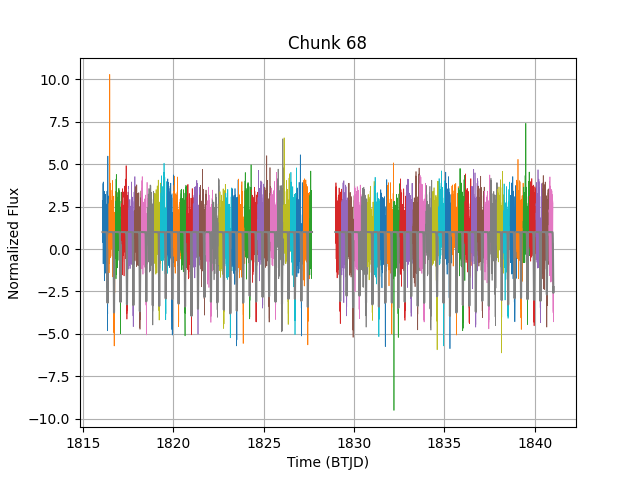

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
import lightkurve as lk
from scipy.optimize import curve_fit
import pandas as pd
from scipy.interpolate import make_interp_spline as spline

plt.figure()

TIC = 'TIC 3034524' 


data_all = lk.search_lightcurve(TIC, author='SPOC')

data = data_all[0]

lc = data.download_all().stitch()

# Define the Gaussian function
def gaussian_function(x, A, mu, sigma):
    return -(A * np.exp(-((x - mu)**2) / (2 * sigma**2))-1)

def process_chunk(start_index, end_index, mu_fit):
    print(start_index, end_index)
    Times = lc.time[start_index:end_index]
    t = Time(Times)
    x = np.array(t.btjd)
    y = np.array(lc.flux[start_index:end_index])
    
    # Remove invalid values (infs and NaNs) from y and x arrays
    mask_valid = ~np.isnan(y) & ~np.isinf(y)
    x = x[mask_valid]
    y = y[mask_valid]
    
    while len(x) > 3:
        # Fitting the curve to the data
        initial_guess = [10, mu_fit, 0.17]  # Assume initial values for A, μ and σ
        params, covariance = curve_fit(gaussian_function, x, y, p0=initial_guess)

        # Get fitted values for A, μ and σ
        A_fit, mu_fit, sigma_fit = params

        # Get the diagonals of the covariance matrix as the variances of A, μ and σ
        var_A_fit, var_mu_fit, var_sigma_fit = np.diag(covariance)

        # Create points for the fitted curve
        x_fit = np.linspace(min(x), max(x), 1000)
        y_fit = gaussian_function(x_fit, A_fit, mu_fit, sigma_fit)

        # Calculate the errors as the square root of the variances
        error_A_fit = np.sqrt(var_A_fit)
        error_mu_fit = np.sqrt(var_mu_fit)
        error_sigma_fit = np.sqrt(var_sigma_fit)

        # Smooth the data (uncomment the bottom 3 lines to see the smoothed curve)
        xnew = np.linspace(x.min(), x.max(), 5000)  
        spl = spline(x, y, k=3)
        y_smooth = spl(xnew)

        # plt.figure()                                  #uncomment to see each chunk separately
        # plt.scatter(x, y, linewidth=0, color='orange', marker='.') #comment this line to see the smoothed curve
        plt.plot(xnew,y_smooth, linewidth=0.5)        #uncomment this line to see the smoothed curve
        plt.plot(x_fit, y_fit, color='gray')
        plt.title('Chunk ' + str(i))
        plt.xlabel('Time (BTJD)')
        plt.ylabel('Normalized Flux')
        plt.grid(True)

        print("\nParameters and their errors", i, ":")
        print("A =", A_fit, "+/-", error_A_fit)
        print("mu =", mu_fit, "+/-", error_mu_fit)
        print("Sigma =", sigma_fit, "+/-", error_sigma_fit, "\n")
        return mu_fit
    if len(x) <= 3:
        mu_guess=1829
        initial_guess = [A_guess, mu_guess, sigma_guess]
        mu_fit = initial_guess[1]

        return mu_fit
    
# Define initial guesses for A, mu, and sigma
A_guess = 10
mu_guess = 1816.3
sigma_guess = 0.17

# Create the initial_guess list
initial_guess = [A_guess, mu_guess, sigma_guess]

# Get the period in julian days
period_julian_days = 0.357452436602186

# Initialize mu_fit with the initial guess value for mu
mu_fit = initial_guess[1]

# Iterate through the light curve and process chunks of data with the given period
start_index = 0
i=1

# while start_index < 250:  #uncomment this line to limit for testing purposes
while start_index < len(lc):
    end_time = lc.time[start_index] + period_julian_days
    end_index = np.searchsorted(lc.time, end_time, side='right')
    
    # Call process_chunk with the updated mu_fit value
    mu_fit = process_chunk(start_index, end_index, mu_fit)
    mu_fit = mu_fit + period_julian_days   
    
    #Update the start_index for the next iteration
    start_index = end_index
    i=i+1

plt.show()

In [ ]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
import lightkurve as lk
from scipy.optimize import curve_fit
import pandas as pd

plt.figure()

TIC = 'TIC 18250189'

data_all = lk.search_lightcurve(TIC, author='SPOC')

data = data_all[0]

lc = data.download_all().stitch()

# Define the Gaussian function
def gaussian_function(x, A, mu, sigma):
    return -(A * np.exp(-((x - mu)**2) / (2 * sigma**2))-1)

def process_chunk(start_index, end_index, mu_fit):
    Times = lc.time[start_index:end_index]
    t = Time(Times)
    x = np.array(t.btjd)
    y = np.array(lc.flux[start_index:end_index])
    
    # Remove invalid values (infs and NaNs) from y and x arrays
    mask_valid = ~np.isnan(y) & ~np.isinf(y)
    x = x[mask_valid]
    y = y[mask_valid]
    
    while len(x) > 3:
        # Fitting the curve to the data
        initial_guess = [0.2563, mu_fit, 0.01]  # Assume initial values for A, μ and σ
        
        # Specify parameter bounds here
        bounds = ([0, mu_fit - 0.05, 0.01], [10, mu_fit + 0.05, 0.1])
        
        params, covariance = curve_fit(gaussian_function, x, y, p0=initial_guess, bounds = bounds)

        # Get fitted values for A, μ and σ
        A_fit, mu_fit, sigma_fit = params

        # Get the diagonals of the covariance matrix as the variances of A, μ and σ
        var_A_fit, var_mu_fit, var_sigma_fit = np.diag(covariance)

        # Create points for the fitted curve
        x_fit = np.linspace(min(x), max(x), 1000)
        y_fit = gaussian_function(x_fit, A_fit, mu_fit, sigma_fit)

        # Calculate the errors as the square root of the variances
        error_A_fit = np.sqrt(var_A_fit)
        error_mu_fit = np.sqrt(var_mu_fit)
        error_sigma_fit = np.sqrt(var_sigma_fit)

        mu_fit_values.append(mu_fit)
        error_mu_fit_values.append(error_mu_fit)

        # plt.figure()
        
        plt.scatter(x, y, linewidth=0, color='orange', marker='.')
        plt.plot(x_fit, y_fit, color='gray')
        plt.xlabel('Time (BTJD)')
        plt.ylabel('Normalized Flux')
        plt.grid(True)

        print("\nParameters and their errors", i, ":")
        print("A =", A_fit, "+/-", error_A_fit)
        print("mu =", mu_fit, "+/-", error_mu_fit)
        print("Sigma =", sigma_fit, "+/-", error_sigma_fit, "\n")
        return mu_fit
    if len(x) <= 3:
        mu_guess= 1777.85513003
        
        return mu_fit
    
# Define initial guesses for A, mu, and sigma
A_guess = 0.2563
mu_guess = 1764.73228
sigma_guess = 0.01345

# Create the initial_guess list
initial_guess = [A_guess, mu_guess, sigma_guess]

# Get the period in julian days
period_julian_days = 0.13959598131089002

# Initialize mu_fit with the initial guess value for mu
mu_fit = initial_guess[1]

# Initialize empty lists for mu_fit and error_mu_fit
mu_fit_values = []
error_mu_fit_values = []

# Iterate through the light curve and process chunks of data with the given period
start_index = 0
i=1
while start_index < len(lc):
    end_time = lc.time[start_index] + period_julian_days
    end_index = np.searchsorted(lc.time, end_time, side='right')
    
    # Call process_chunk with the updated mu_fit value
    mu_fit = process_chunk(start_index, end_index, mu_fit)
    mu_fit = mu_fit + period_julian_days   
    
    #Update the start_index for the next iteration
    start_index = end_index
    i=i+1
    
data_table = pd.DataFrame({
    'mu_fit': mu_fit_values,
    'error_mu_fit': error_mu_fit_values
})

#data_table.to_csv("/Users/Menna/Downloads/O Values", index = False)

plt.show()
print(data_table)
